In [1]:
import tensorflow as tf
from tensorflow import keras 
from platform import python_version

In [2]:
print(tf.__version__)

2.10.1


In [3]:
print(python_version())

3.10.0


In [4]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
tf.test.is_built_with_gpu_support()

True

In [9]:
import splitfolders

In [10]:
input_folder = 'Weeds/data/'

In [19]:
splitfolders.fixed(input_folder, output = 'Weeds/updated_data/',
                   seed = 110, fixed = (0, 150),
                   group_prefix = None,
                   oversample = True)

In [8]:
import os

In [9]:
data_dir = 'Weeds/updated_data/'

In [10]:
os.listdir(data_dir)

['test', 'train']

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%config InlineBackend.figure_format = 'svg'

In [12]:
test_path = data_dir + 'test/'
train_path = data_dir + 'train/'

In [13]:
os.listdir(test_path)

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'ShepherdΓÇÖs Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [14]:
os.listdir(train_path)

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'ShepherdΓÇÖs Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [15]:
os.listdir(train_path + 'Black-grass')[0]

'103.png'

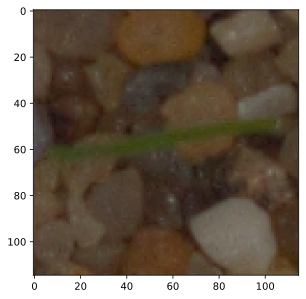

In [16]:
para_cell = (train_path + 'Black-grass\\' + '103.png')
plt.imshow(imread(para_cell))

In [17]:
for i in os.listdir(train_path):
    print(f'{i}: {len(os.listdir(train_path + i))}')

Black-grass: 612
Charlock: 612
Cleavers: 612
Common Chickweed: 612
Common wheat: 612
Fat Hen: 612
Loose Silky-bent: 612
Maize: 612
Scentless Mayweed: 612
ShepherdΓÇÖs Purse: 612
Small-flowered Cranesbill: 612
Sugar beet: 612


In [18]:
for i in os.listdir(test_path):
    print(f'{i}: {len(os.listdir(test_path + i))}')

Black-grass: 150
Charlock: 150
Cleavers: 150
Common Chickweed: 150
Common wheat: 150
Fat Hen: 150
Loose Silky-bent: 150
Maize: 150
Scentless Mayweed: 150
ShepherdΓÇÖs Purse: 150
Small-flowered Cranesbill: 150
Sugar beet: 150


In [19]:
dim1 = []
dim2 = []

for i in os.listdir(test_path):
    for image_filename in os.listdir(test_path + i):
        img = imread(test_path + i + '\\' + image_filename)

        d1, d2, colors = img.shape
        dim1.append(d1)
        dim2.append(d2)

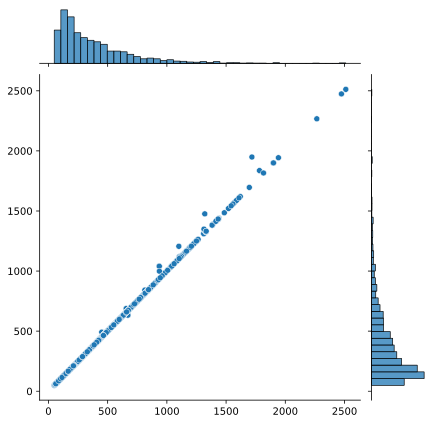

In [21]:
sns.jointplot(x = dim1, y = dim2)

In [22]:
print(np.mean(dim1), np.mean(dim2))

382.83722222222224 383.3183333333333


In [23]:
IMG_SHAPE = (380, 380, 3)

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
image_gen = ImageDataGenerator(rotation_range = 20, 
                               brightness_range=[0.7,1.5]
                               rescale = 1 / 255,
                               shear_range = 0.1,
                               zoom_range = 0.1,
                               horizontal_flip = True,
                               fill_mode = 'nearest')

In [26]:
image_gen.flow_from_directory(train_path)

Found 7344 images belonging to 12 classes.


In [27]:
image_gen.flow_from_directory(test_path)

Found 1800 images belonging to 12 classes.


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf

In [29]:
# 8 Layer Model: 5 Convolution Layers with non-increasing kernel size and 3 fully connnected layers
AlexNetModel = Sequential()

AlexNetModel.add(Conv2D(filters = 96, kernel_size = (11, 11), strides=(4, 4), activation = 'relu', input_shape = IMG_SHAPE)),
AlexNetModel.add(BatchNormalization()),
AlexNetModel.add(MaxPool2D(pool_size=(3,3), strides=(2,2))),

AlexNetModel.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same")),
AlexNetModel.add(BatchNormalization()),
AlexNetModel.add(MaxPool2D(pool_size=(3,3), strides=(2,2))),

AlexNetModel.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")),
AlexNetModel.add(BatchNormalization()),
AlexNetModel.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")),
AlexNetModel.add(BatchNormalization()),

AlexNetModel.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")),
AlexNetModel.add(BatchNormalization()),
AlexNetModel.add(MaxPool2D(pool_size=(3,3), strides=(2,2))),

AlexNetModel.add(Flatten()),

AlexNetModel.add(Dense(4096, activation='relu')),
AlexNetModel.add(Dropout(0.5)),

AlexNetModel.add(Dense(4096, activation='relu')),
AlexNetModel.add(Dropout(0.5)),

AlexNetModel.add(Dense(12, activation='softmax'))

AlexNetModel.compile(loss='sparse_categorical_crossentropy', optimizer = tf.optimizers.SGD(learning_rate = 0.001), metrics = ['accuracy'])
AlexNetModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 93, 93, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 93, 93, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 46, 46, 256)      1024      
 hNormalization)                                                 
                                                        

In [30]:
BATCH_SIZE = 32

In [31]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size = IMG_SHAPE[:2],
                                                color_mode = 'rgb',
                                                batch_size = BATCH_SIZE,
                                                class_mode = 'sparse',
                                                shuffle = True)

Found 7344 images belonging to 12 classes.


In [32]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                                target_size = IMG_SHAPE[:2],
                                                color_mode = 'rgb',
                                                batch_size = BATCH_SIZE,
                                                class_mode = 'sparse',
                                                shuffle = False)

Found 1800 images belonging to 12 classes.


In [33]:
train_image_gen.class_indices

{'Black-grass': 0,
 'Charlock': 1,
 'Cleavers': 2,
 'Common Chickweed': 3,
 'Common wheat': 4,
 'Fat Hen': 5,
 'Loose Silky-bent': 6,
 'Maize': 7,
 'Scentless Mayweed': 8,
 'ShepherdΓÇÖs Purse': 9,
 'Small-flowered Cranesbill': 10,
 'Sugar beet': 11}

In [34]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger

In [39]:
saveCheckpointsPath = "weed_saved_models/improved-{epoch:02d}-{val_accuracy:.2f}.hdf5"

In [40]:
checkpoint = ModelCheckpoint(saveCheckpointsPath, monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')

In [41]:
early_stop = EarlyStopping(monitor = 'val_loss', verbose = 1, patience = 10, mode = 'min')

In [42]:
log_csv = CSVLogger("my_logs.csv", separator = ',', append = False)

In [43]:
results = AlexNetModel.fit(train_image_gen, epochs = 100, 
                              validation_data = test_image_gen,
                              callbacks = [checkpoint, early_stop, log_csv])

Epoch 1/100
230/230 [==============================] - ETA: 0s - loss: 2.9054 - accuracy: 0.2553
Epoch 1: val_accuracy improved from -inf to 0.10278, saving model to weed_saved_models\improved-01-0.10.hdf5
230/230 [==============================] - 420s 2s/step - loss: 2.9054 - accuracy: 0.2553 - val_loss: 3.4573 - val_accuracy: 0.1028
Epoch 2/100
230/230 [==============================] - ETA: 0s - loss: 1.7015 - accuracy: 0.4521
Epoch 2: val_accuracy improved from 0.10278 to 0.17500, saving model to weed_saved_models\improved-02-0.17.hdf5
230/230 [==============================] - 425s 2s/step - loss: 1.7015 - accuracy: 0.4521 - val_loss: 2.8827 - val_accuracy: 0.1750
Epoch 3/100
230/230 [==============================] - ETA: 0s - loss: 1.3538 - accuracy: 0.5541
Epoch 3: val_accuracy improved from 0.17500 to 0.45056, saving model to weed_saved_models\improved-03-0.45.hdf5
230/230 [==============================] - 430s 2s/step - loss: 1.3538 - accuracy: 0.5541 - val_loss: 1.6098 - v

In [52]:
losses = pd.DataFrame(AlexNetModel.history.history)

<Axes: >

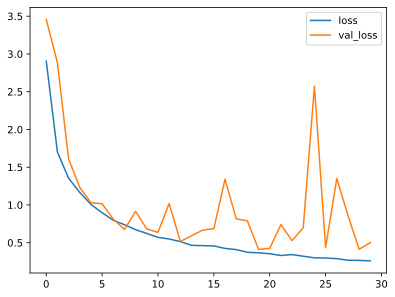

In [53]:
losses[['loss', 'val_loss']].plot()

In [ ]:
with open('/trainHistoryDict', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [45]:
from tensorflow.keras.models import load_model

In [46]:
model = load_model('weed_saved_models/improved-20-0.86.hdf5')

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 93, 93, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 93, 93, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 46, 46, 256)      1024      
 hNormalization)                                                 
                                                        

In [48]:
model.evaluate(test_image_gen)

57/57 [==============================] - 68s 1s/step - loss: 0.4071 - accuracy: 0.8589


[0.4070670008659363, 0.8588888645172119]

In [51]:
model.metrics_names

['loss', 'accuracy']

In [54]:
train_accuracy = results.history['accuracy']
val_accuracy = results.history['val_accuracy']

train_loss = results.history['loss']
val_loss = results.history['val_loss']

# learning_rate = results.history['learning_rate']

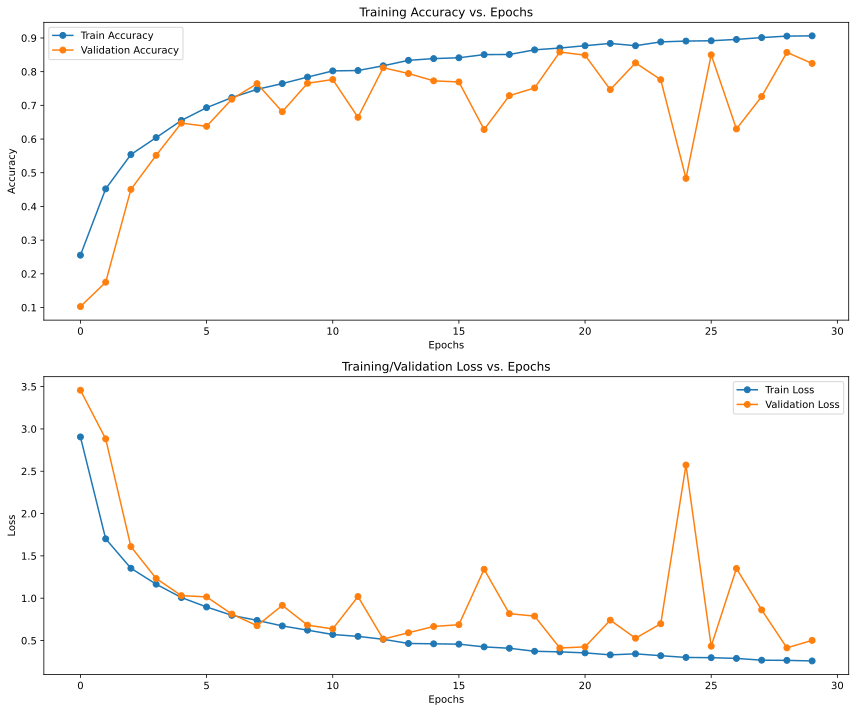

In [55]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()

In [56]:
pred = AlexNetModel.predict(test_image_gen)

57/57 [==============================] - 63s 1s/step


In [57]:
labels = {value: key for key, value in train_image_gen.class_indices.items()}
print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Black-grass
1 : Charlock
2 : Cleavers
3 : Common Chickweed
4 : Common wheat
5 : Fat Hen
6 : Loose Silky-bent
7 : Maize
8 : Scentless Mayweed
9 : ShepherdΓÇÖs Purse
10 : Small-flowered Cranesbill
11 : Sugar beet


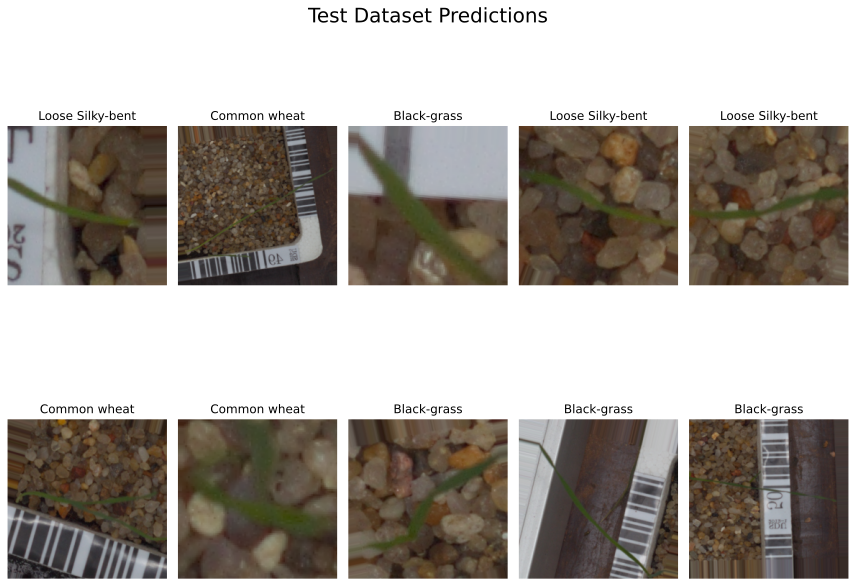

In [58]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(pred[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_image_gen[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [59]:
y_pred = np.argmax(pred, axis = 1)
y_test = test_image_gen.classes

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
print(classification_report(y_test, y_pred, target_names=labels.values()))

                           precision    recall  f1-score   support

              Black-grass       0.58      0.61      0.59       150
                 Charlock       0.81      0.95      0.87       150
                 Cleavers       0.92      0.95      0.93       150
         Common Chickweed       0.98      0.78      0.87       150
             Common wheat       0.72      0.95      0.82       150
                  Fat Hen       0.94      0.87      0.90       150
         Loose Silky-bent       0.71      0.53      0.61       150
                    Maize       0.94      0.89      0.91       150
        Scentless Mayweed       0.80      0.97      0.88       150
       ShepherdΓÇÖs Purse       0.88      0.71      0.79       150
Small-flowered Cranesbill       0.90      0.83      0.86       150
               Sugar beet       0.86      0.95      0.90       150

                 accuracy                           0.83      1800
                macro avg       0.84      0.83      0.83    

In [63]:
print(confusion_matrix(y_test, y_pred))

[[ 91   0   0   0  29   0  28   0   0   0   0   2]
 [  0 142   3   0   0   0   0   3   0   2   0   0]
 [  0   2 142   0   4   0   0   0   1   1   0   0]
 [  2   0   1 117   0   1   0   2   6   8  12   1]
 [  3   0   1   1 142   0   3   0   0   0   0   0]
 [  1   5   0   0   7 131   1   0   0   1   0   4]
 [ 56   0   0   0  11   0  80   0   2   0   0   1]
 [  1  10   0   0   0   1   1 133   0   0   0   4]
 [  2   0   0   0   0   0   0   0 146   0   0   2]
 [  0  11   2   0   0   1   0   0  27 106   2   1]
 [  0   5   4   0   1   5   0   1   0   2 124   8]
 [  0   0   1   1   2   1   0   3   0   0   0 142]]
